In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split

In [2]:
df_sample = pd.read_csv("/content/drive/MyDrive/Y Môn khác/datapreparing/Final Exam/dataset/sample.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Y Môn khác/datapreparing/Final Exam/dataset/test.csv", sep=";")
df_train = pd.read_csv("/content/drive/MyDrive/Y Môn khác/datapreparing/Final Exam/dataset/train.csv", sep=";")

# **Read and Understand data**

### description

* **Name**: The brand and model of the car.

* **Year**: The year or edition of the model.

* **km_driven**: The total kilometres driven in the car by the previous owner(s) in KM.

* **fuel**: The type of fuel used by the car.

* **transmission**: The type of transmission used by the car.

* **owner**: Whether the ownership is Firsthand, Second hand or other.

* **mileage**: The standard mileage offered by the car company in kmpl or km/kg

* **Engine**: The displacement volume of the engine in cc.

* **max_power**: The maximum power of the engine in bhp.

* **torque**:

* **seats**: The number of seats in the car.


In [3]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


In [4]:
df_train.shape

(6000, 13)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6000 non-null   object 
 1   year           6000 non-null   int64  
 2   selling_price  6000 non-null   int64  
 3   km_driven      6000 non-null   int64  
 4   fuel           6000 non-null   object 
 5   seller_type    6000 non-null   object 
 6   transmission   6000 non-null   object 
 7   owner          6000 non-null   object 
 8   mileage        5841 non-null   object 
 9   engine         5841 non-null   object 
 10  max_power      5846 non-null   object 
 11  torque         5840 non-null   object 
 12  seats          5841 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 609.5+ KB


In [6]:
df_train.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          159
engine           159
max_power        154
torque           160
seats            159
dtype: int64

In [7]:
df_train.describe()

,year,selling_price,km_driven,seats
count,6000.000000,6.000000e+03,6.000000e+03,5841.000000
mean,2013.814833,6.387764e+05,6.997216e+04,5.429550
std,4.026733,8.066632e+05,5.188961e+04,0.977071
min,1983.000000,3.000000e+04,1.000000e+03,2.000000
25%,2011.000000,2.557498e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.900000e+04,5.000000
max,2020.000000,1.000000e+07,1.500000e+06,14.000000


### clean

In [8]:
#modifying mileage, engine, max_power column
df_train['mileage']=df_train[df_train.mileage.notnull()].mileage.apply(lambda x: x.split(' ')[0])
df_train['engine']=df_train[df_train.engine.notnull()].engine.apply(lambda x: x.split(' ')[0])
df_train['max_power']=df_train[df_train.max_power.notnull()].max_power.apply(lambda x: x.split(' ')[0])
df_train['name'] = df_train['name'].str.split(' ').str[0]

In [10]:
df_train['mileage'] = df_train['mileage'].apply(pd.to_numeric, errors='coerce')
df_train['engine'] = df_train['engine'].apply(pd.to_numeric, errors='coerce')
df_train['max_power'] = df_train['max_power'].apply(pd.to_numeric, errors='coerce')

In [12]:
print(df_train['fuel'].unique())
print(df_train['transmission'].unique())
print(df_train['owner'].unique())
print(df_train['seats'].unique())
print(df_train['year'].unique())

['Diesel' 'Petrol' 'LPG' 'CNG']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']
[ 5.  7. nan  4.  9.  8. 10.  6.  2. 14.]
[2018 2015 2019 2013 2017 2011 2012 2007 2016 2020 2005 2010 2014 2008
 2006 2009 2001 2004 1997 1994 2003 2000 1999 1998 2002 1996 1995 1983]


In [13]:
print(df_train['selling_price'].median())
print(df_train['selling_price'].mean())
df_train['selling_price'].max()

450000.0
638776.3625


10000000

In [15]:
df_train=df_train[~(df_train.selling_price == 10000000)]

In [17]:
df_train.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.50,1497.0,108.50,260Nm@ 1500-2750rpm,5.0
1,Hyundai,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19,1396.0,88.76,219.66nm@ 1500-2750rpm,5.0
2,Toyota,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55,2982.0,168.50,360Nm@ 1400-3200rpm,7.0


In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5999 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5999 non-null   object 
 1   year           5999 non-null   int64  
 2   selling_price  5999 non-null   int64  
 3   km_driven      5999 non-null   int64  
 4   fuel           5999 non-null   object 
 5   seller_type    5999 non-null   object 
 6   transmission   5999 non-null   object 
 7   owner          5999 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   float64
 10  max_power      5844 non-null   float64
 11  torque         5839 non-null   object 
 12  seats          5840 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 656.1+ KB


<ipython-input-19-d5920470ce2b>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df_train.corr(method='pearson')


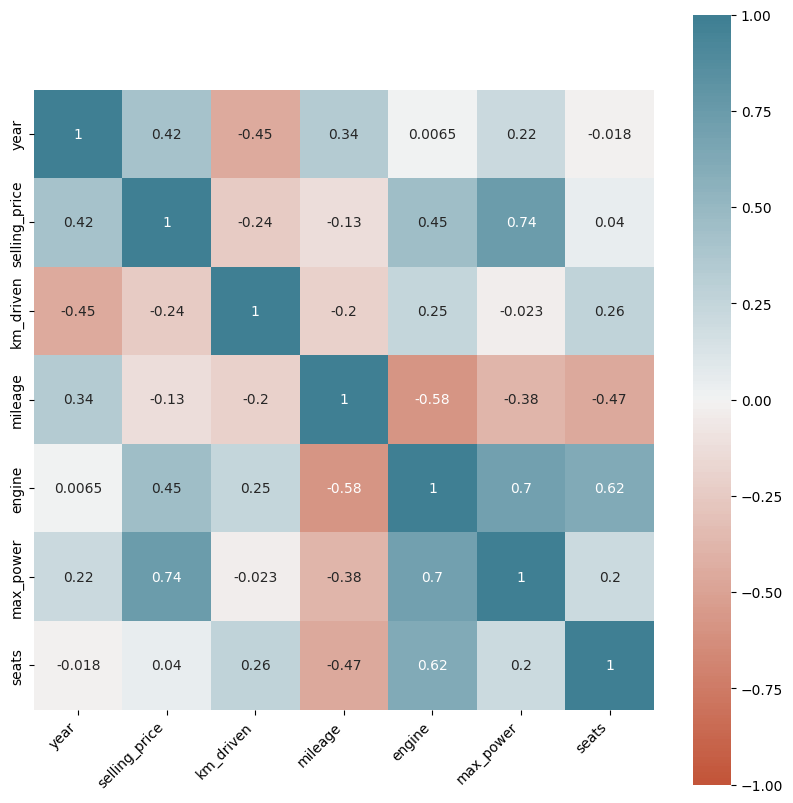

In [19]:
# correlation

# pd.set_option('precision', 2)
cor = df_train.corr(method='pearson')
# select features that have high absolute correlation with output.
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(
    cor,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    ax=ax,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# **Data Visualization**

<ipython-input-20-ef22bb55efab>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g1 = sns.distplot(df_train["selling_price"], color="blue",ax = axes)


Text(0.5, 1.0, 'Distributional of price')

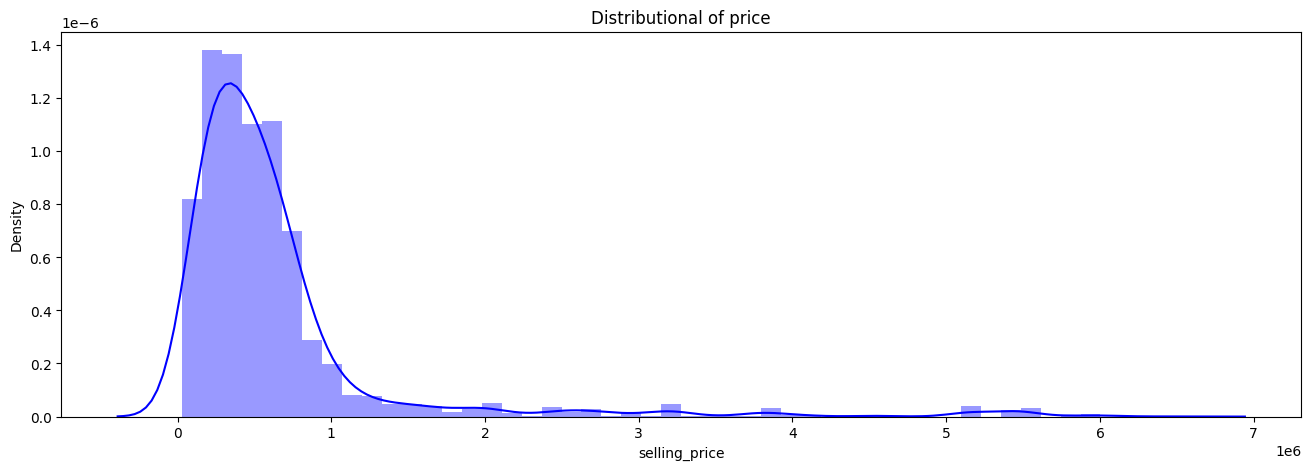

In [20]:
f, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df_train["selling_price"], color="blue",ax = axes)
plt.title("Distributional of price")

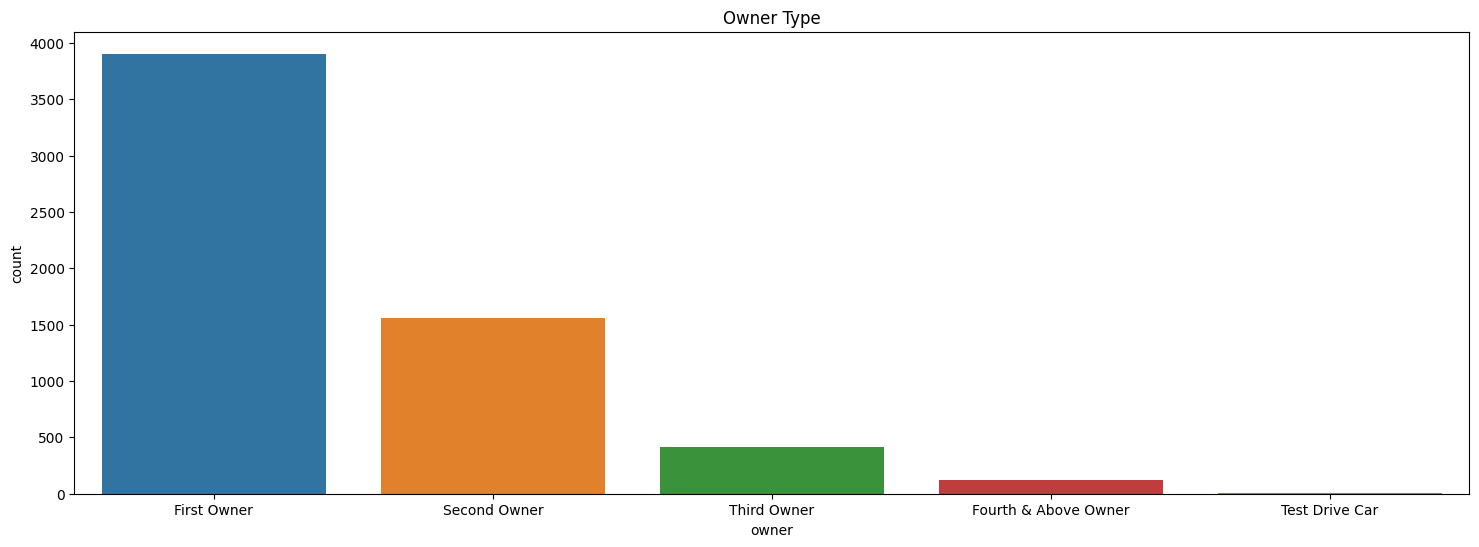

In [21]:
plt.figure(figsize=(18,6))
sns.countplot(x='owner', data=df_train)
plt.title('Owner Type')
plt.show()

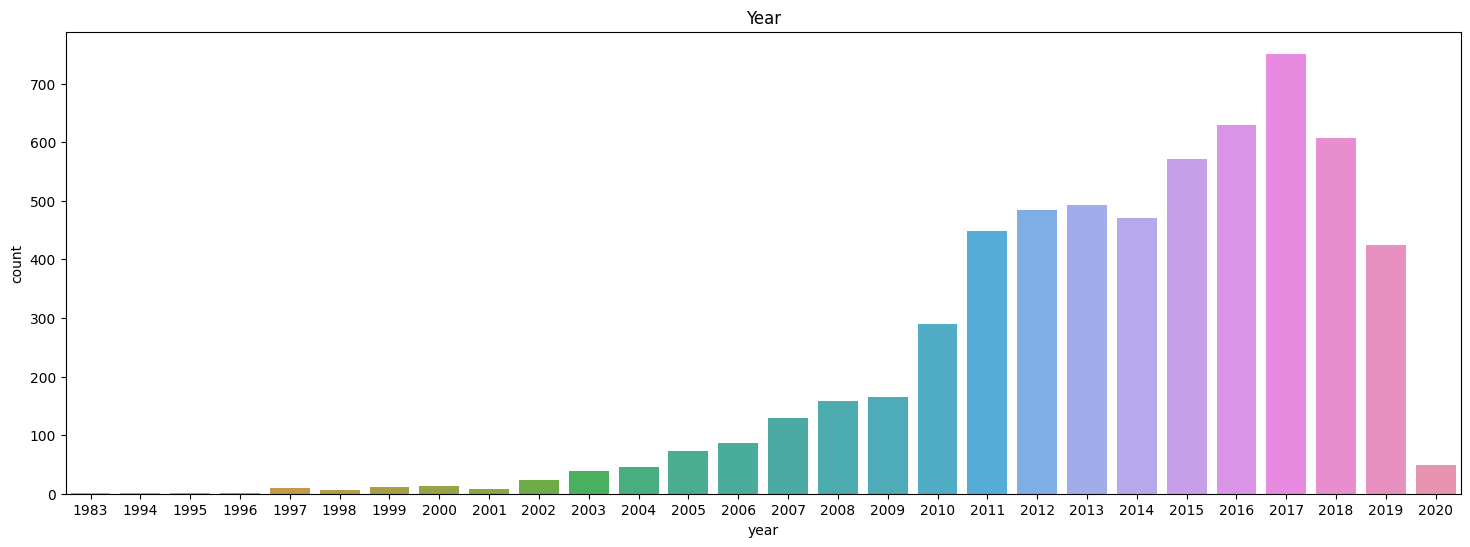

In [22]:
plt.figure(figsize=(18,6))
sns.countplot(x='year', data=df_train)
plt.title('Year')
plt.show()

Xe cũ nhất được sản xuất năm 1983, còn lại thì khoảng từ 2011-2017

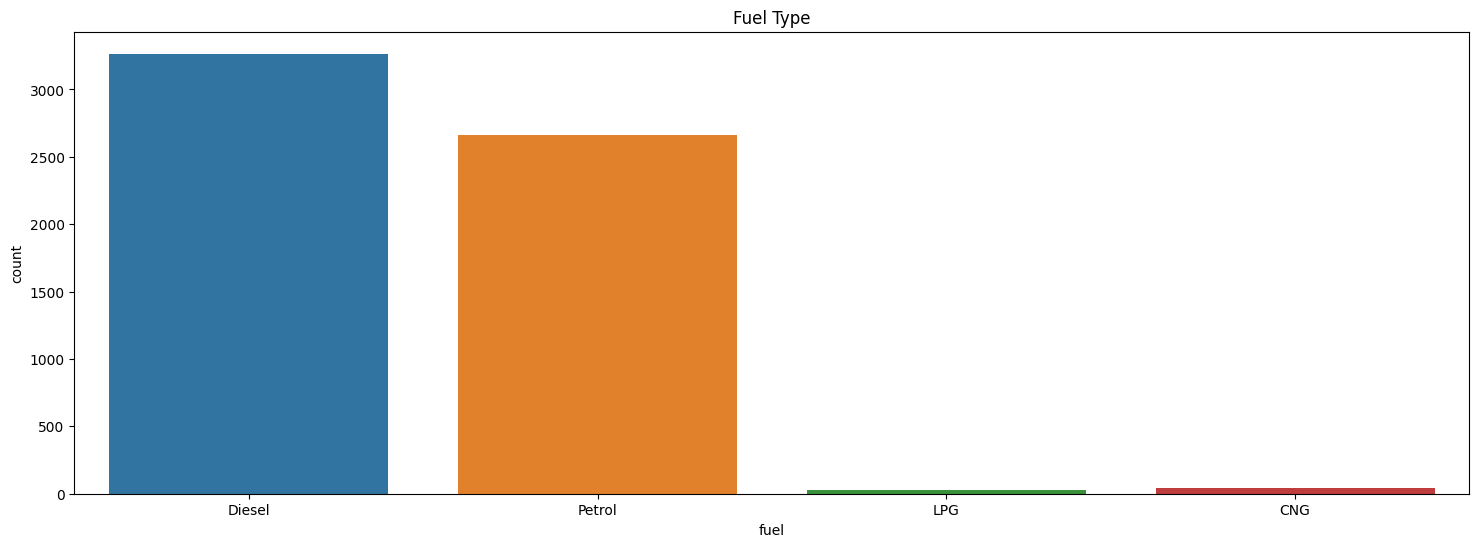

In [23]:
plt.figure(figsize=(18,6))
sns.countplot(x='fuel', data=df_train)
plt.title('Fuel Type')
plt.show()

 Loại nhiên liệu nhiều nhất là Diesel và Petrol

In [24]:
df_train.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.50,1497.0,108.50,260Nm@ 1500-2750rpm,5.0
1,Hyundai,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19,1396.0,88.76,219.66nm@ 1500-2750rpm,5.0
2,Toyota,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55,2982.0,168.50,360Nm@ 1400-3200rpm,7.0


In [25]:
# sns.barplot(df_train["owner"],df_train["km_driven"],hue= df_train["transmission"],palette="spring")
# plt.xticks(rotation=80)
# plt.title("Transmission: Kilometers_Driven comparsion")

# **Preprocess**

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5999 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5999 non-null   object 
 1   year           5999 non-null   int64  
 2   selling_price  5999 non-null   int64  
 3   km_driven      5999 non-null   int64  
 4   fuel           5999 non-null   object 
 5   seller_type    5999 non-null   object 
 6   transmission   5999 non-null   object 
 7   owner          5999 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   float64
 10  max_power      5844 non-null   float64
 11  torque         5839 non-null   object 
 12  seats          5840 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 656.1+ KB


In [27]:
x1 = df_train[df_train.mileage.isnull()==True]
x1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
14,Maruti,2005,85000,100000,Petrol,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
106,Hyundai,2001,60000,71000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
113,Toyota,2012,350000,40000,Petrol,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,NaN
142,Toyota,2012,275000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
149,Maruti,2011,200000,40000,Petrol,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN


In [28]:
x1.seller_type.value_counts()

Individual    146
Dealer         13
Name: seller_type, dtype: int64

In [29]:
x1.transmission.value_counts()

Manual       155
Automatic      4
Name: transmission, dtype: int64

In [30]:
x1.fuel.value_counts()

Petrol    82
Diesel    73
CNG        2
LPG        2
Name: fuel, dtype: int64

In [31]:
x1.year.value_counts()

2012    24
2005    17
2011    17
2006    14
2010    13
2003    11
2009     9
2008     9
2004     7
2002     7
2007     6
2017     6
2001     3
1999     3
2000     3
1997     2
2016     2
2013     1
1983     1
2014     1
1998     1
2015     1
1995     1
Name: year, dtype: int64

In [32]:
df_train.query("year == 1983")['year']

1315    1983
Name: year, dtype: int64

In [33]:
df_train.query("mileage == 0")['mileage']

343     0.0
721     0.0
763     0.0
1266    0.0
1883    0.0
2068    0.0
2499    0.0
2884    0.0
4224    0.0
4270    0.0
5376    0.0
5402    0.0
5837    0.0
Name: mileage, dtype: float64

In [34]:
x2 = df_train
x2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.50,1497.0,108.50,260Nm@ 1500-2750rpm,5.0
1,Hyundai,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19,1396.0,88.76,219.66nm@ 1500-2750rpm,5.0
2,Toyota,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55,2982.0,168.50,360Nm@ 1400-3200rpm,7.0
3,Hyundai,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01,1591.0,121.30,154.9Nm@ 4200rpm,5.0
4,Volvo,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.00,1969.0,190.00,400Nm,5.0


In [35]:
x2.replace({"First Owner":1,"Second Owner":2,"Third Owner": 3,"Fourth & Above Owner":4, "Test Drive Car":5},inplace=True)
x2.replace({"Manual": 1, "Automatic": 0}, inplace=True)
x2.replace({"Individual": 0, "Dealer": 1, "Trustmark Dealer":2}, inplace=True)
x2.replace({"Diesel":1,"Petrol":2,"LPG": 3,"CNG":4},inplace=True)

x2.head()



,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata,2018,850000,9500,1,0,1,1,21.50,1497.0,108.50,260Nm@ 1500-2750rpm,5.0
1,Hyundai,2018,750000,30000,1,0,1,1,21.19,1396.0,88.76,219.66nm@ 1500-2750rpm,5.0
2,Toyota,2015,1500000,80000,1,0,0,2,12.55,2982.0,168.50,360Nm@ 1400-3200rpm,7.0
3,Hyundai,2015,795000,35000,2,0,1,1,17.01,1591.0,121.30,154.9Nm@ 4200rpm,5.0
4,Volvo,2019,3800000,20000,1,0,0,1,18.00,1969.0,190.00,400Nm,5.0


In [37]:
df_train['name'] = df_train['name'].str.split(' ').str[0]

<ipython-input-38-2266c1819c80>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(),annot=True)


<Axes: >

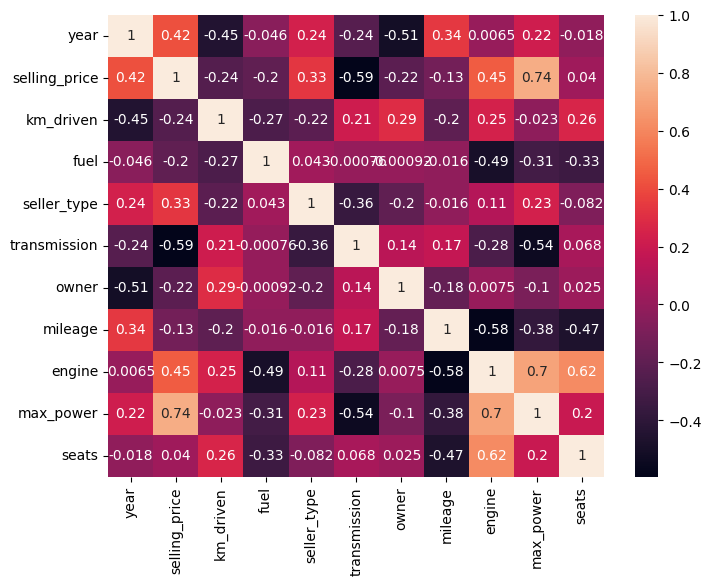

In [38]:
plt.figure(figsize=(8,6))
sns.heatmap(df_train.corr(),annot=True)

In [40]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata,2018,850000,9500,1,0,1,1,21.50,1497.0,108.50,260Nm@ 1500-2750rpm,5.0
1,Hyundai,2018,750000,30000,1,0,1,1,21.19,1396.0,88.76,219.66nm@ 1500-2750rpm,5.0
2,Toyota,2015,1500000,80000,1,0,0,2,12.55,2982.0,168.50,360Nm@ 1400-3200rpm,7.0
3,Hyundai,2015,795000,35000,2,0,1,1,17.01,1591.0,121.30,154.9Nm@ 4200rpm,5.0
4,Volvo,2019,3800000,20000,1,0,0,1,18.00,1969.0,190.00,400Nm,5.0


In [41]:
print(df_train['fuel'].unique())
print(df_train['seller_type'].unique())
print(df_train['transmission'].unique())
print(df_train['owner'].unique())

[1 2 3 4]
[0 1 2]
[1 0]
[1 2 3 4 5]


In [42]:
!pip install category_encoders

In [43]:
import category_encoders as ce
encoder = ce.TargetEncoder()
df_train['name'] = encoder.fit_transform(df_train['name'], df_train['selling_price'])
#test['name'] = encoder.transform(test['name'])

In [44]:
from sklearn.preprocessing import LabelEncoder
le_owner=LabelEncoder()
df_train['owner_n']=le_owner.fit_transform(df_train['owner'])
df_train=pd.get_dummies(df_train,columns=['fuel','transmission','seller_type'],drop_first=True)


In [46]:
df_train.drop(['owner'],1,inplace=True)
df_train.drop(["torque"],axis=1,inplace=True)


<ipython-input-46-00487b850328>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_train.drop(['owner'],1,inplace=True)


In [47]:
df_train.head()

,name,year,selling_price,km_driven,mileage,engine,max_power,seats,owner_n,fuel_2,fuel_3,fuel_4,transmission_1,seller_type_1,seller_type_2
0,3.734045e+05,2018,850000,9500,21.50,1497.0,108.50,5.0,0,0,0,0,1,0,0
1,4.679383e+05,2018,750000,30000,21.19,1396.0,88.76,5.0,0,0,0,0,1,0,0
2,1.002410e+06,2015,1500000,80000,12.55,2982.0,168.50,7.0,1,0,0,0,0,0,0
3,4.679383e+05,2015,795000,35000,17.01,1591.0,121.30,5.0,0,1,0,0,1,0,0
4,2.952321e+06,2019,3800000,20000,18.00,1969.0,190.00,5.0,0,0,0,0,0,0,0


In [48]:
y = df_train['selling_price']
X = df_train.drop(columns=['selling_price'])
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=9)

print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (4087, 14)
Y train shape:  (4087,)
X test shape:  (1752, 14)
Y test shape:  (1752,)


# Build model

In [49]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

## linear regression

In [50]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)
y_pred= linear_reg.predict(X_test)

print("\t\tError Table")
print("Accuracy on Traing set: ",linear_reg.score(X_train,Y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,Y_test))
print('MAE      : ', metrics.mean_absolute_error(Y_test, y_pred))
print('MSE      : ', metrics.mean_squared_error(Y_test, y_pred))
print('Root MSE : ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('R-SE     : ', metrics.r2_score(Y_test, y_pred))

		Error Table
Accuracy on Traing set:  0.8172115465169861
Accuracy on Testing set:  0.837068283448317
MAE      :  184771.984479866
MSE      :  102692330047.68715
Root MSE :  320456.44017196336
R-SE     :  0.837068283448317


In [55]:
compare = pd.DataFrame({'Prediction': y_pred, 'Test Data' : Y_test, 'Abs error': abs(Y_test - y_pred), 'AAD%': abs(Y_test - y_pred)/Y_test*100})
compare.head(10)

,Prediction,Test Data,Abs error,AAD%
1560,3.150519e+06,2475000,6.755194e+05,27.293715
3742,2.282404e+06,725000,1.557404e+06,214.814364
1886,2.310405e+05,210000,2.104052e+04,10.019294
2046,8.770382e+05,1400000,5.229618e+05,37.354412
2430,2.966721e+05,320000,2.332792e+04,7.289976
1850,5.504073e+05,245000,3.054073e+05,124.656058
4884,8.654015e+05,650000,2.154015e+05,33.138687
889,6.816362e+05,434999,2.466372e+05,56.698330
4565,7.531017e+05,800000,4.689829e+04,5.862286
2446,1.773011e+05,225000,4.769894e+04,21.199528


## random forest

In [51]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, Y_train)
y_pred= rf_reg.predict(X_test)

print("\t\tError Table")
print("Accuracy on Traing set: ",rf_reg.score(X_train,Y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,Y_test))
print('MAE      : ', metrics.mean_absolute_error(Y_test, y_pred))
print('MSE      : ', metrics.mean_squared_error(Y_test, y_pred))
print('Root MSE : ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('R-SE     : ', metrics.r2_score(Y_test, y_pred))

		Error Table
Accuracy on Traing set:  0.9955387002894167
Accuracy on Testing set:  0.9726455769042465
MAE      :  69772.15437034534
MSE      :  17240900079.28036
Root MSE :  131304.60798951559
R-SE     :  0.9726455769042465


## XGboost regression

In [52]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

net = xgb.XGBRegressor()
net.fit(X_train, Y_train)
y_pred= rf_reg.predict(X_test)


print("\t\tError Table")
print("Accuracy on Traing set: ",rf_reg.score(X_train,Y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,Y_test))
print('MAE      : ', metrics.mean_absolute_error(Y_test, y_pred))
print('MSE      : ', metrics.mean_squared_error(Y_test, y_pred))
print('Root MSE : ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('R-SE     : ', metrics.r2_score(Y_test, y_pred))

		Error Table
Accuracy on Traing set:  0.9955387002894167
Accuracy on Testing set:  0.9726455769042465
MAE      :  69772.15437034534
MSE      :  17240900079.28036
Root MSE :  131304.60798951559
R-SE     :  0.9726455769042465


## ExtraTreesRegressor

In [53]:
from sklearn.ensemble import ExtraTreesRegressor
rf_reg = ExtraTreesRegressor()
rf_reg.fit(X_train, Y_train)
y_pred= rf_reg.predict(X_test)


print("\t\tError Table")
print("Accuracy on Traing set: ",rf_reg.score(X_train,Y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,Y_test))
print('MAE      : ', metrics.mean_absolute_error(Y_test, y_pred))
print('MSE      : ', metrics.mean_squared_error(Y_test, y_pred))
print('Root MSE : ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('R-SE     : ', metrics.r2_score(Y_test, y_pred))

		Error Table
Accuracy on Traing set:  0.9997676745653914
Accuracy on Testing set:  0.97574298322445
MAE      :  66385.03229261795
MSE      :  15288671999.579033
Root MSE :  123647.36956190792
R-SE     :  0.97574298322445


## LGBMRegressor

In [54]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
lgbm.fit(X_train, Y_train)
y_pred= lgbm.predict(X_test)


print("\t\tError Table")
print("Accuracy on Traing set: ",lgbm.score(X_train,Y_train))
print("Accuracy on Testing set: ",lgbm.score(X_test,Y_test))
print('MAE      : ', metrics.mean_absolute_error(Y_test, y_pred))
print('MSE      : ', metrics.mean_squared_error(Y_test, y_pred))
print('Root MSE : ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('R-SE     : ', metrics.r2_score(Y_test, y_pred))

		Error Table
Accuracy on Traing set:  0.9887505461469266
Accuracy on Testing set:  0.9741341141251948
MAE      :  69473.99488203146
MSE      :  16302707327.021484
Root MSE :  127682.05561871834
R-SE     :  0.9741341141251948


## GradientBoostingRegressor

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
rf_reg = GradientBoostingRegressor()
rf_reg.fit(X_train, Y_train)
y_pred= rf_reg.predict(X_test)
print("Accuracy on Traing set: ",rf_reg.score(X_train,Y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,Y_test))

print("\t\tError Table")
print('MAE      : ', metrics.mean_absolute_error(Y_test, y_pred))
print('MSE      : ', metrics.mean_squared_error(Y_test, y_pred))
print('Root MSE : ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('R-SE     : ', metrics.r2_score(Y_test, y_pred))

Accuracy on Traing set:  0.9795149078320247
Accuracy on Testing set:  0.967730009138153
		Error Table
MAE      :  84221.36236521669
MSE      :  20339075916.93146
Root MSE :  142615.13214568593
R-SE     :  0.967730009138153


# **preprocess test**

In [56]:
df_test = pd.read_csv("/content/drive/MyDrive/Y Môn khác/datapreparing/Final Exam/dataset/test.csv", sep=";")

In [69]:
df_test.head()

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,1,Skoda Rapid 1.6 MPI AT Elegance,2016,11000,Petrol,Dealer,Automatic,First Owner,14.30,1598.0,103.50,153Nm@ 3800rpm,5
1,2,Honda City i VTEC V,2017,35000,Petrol,Individual,Manual,First Owner,17.80,1497.0,117.30,145Nm@ 4600rpm,5
2,3,Hyundai Xcent 1.2 Kappa SX Option,2014,80000,Petrol,Individual,Manual,First Owner,19.10,1197.0,82.00,114Nm@ 4000rpm,5
3,4,Mahindra Scorpio 2009-2014 SLE 7S BSIII,2014,145241,Diesel,Individual,Manual,First Owner,12.05,2179.0,120.00,290Nm@ 1800-2800rpm,7
4,5,Ford Ecosport 1.5 Diesel Titanium,2015,92651,Diesel,Dealer,Manual,First Owner,21.70,1498.0,98.96,215Nm@ 1750-2500rpm,5


In [58]:
df_test["engine"] = df_test["engine"].str.rstrip(" CC")
df_test["max_power"] = df_test["max_power"].str.rstrip(" bhp")
df_test["mileage"] = df_test["mileage"].str.rstrip(" kmpl")
df_test["mileage"] = df_test["mileage"].str.rstrip(" km/kg")

In [67]:
df_test = df_test.replace([np.inf, -np.inf], np.nan)
df_test= df_test.fillna(df_test.median())
# df_test.head()

<ipython-input-67-d5a692f8b4bb>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_test= df_test.fillna(df_test.median())


In [68]:
df_test['engine'] = df_test['engine'].astype(float)
df_test['max_power'] = df_test['max_power'].astype(float)
df_test['mileage'] = df_test['mileage'].astype(float)
df_test['seats'] = df_test['seats'].astype(int)

In [70]:
from sklearn.preprocessing import LabelEncoder
le_owner=LabelEncoder()
df_test['owner_n']=le_owner.fit_transform(df_test['owner'])
df_test=pd.get_dummies(df_test,columns=['fuel','transmission','seller_type'],drop_first=True)


In [71]:
# df_test.drop(["name"],axis=1,inplace=True)
#df_test.drop(["Id"],axis=1,inplace=True)
df_test.drop(["torque"],axis=1,inplace=True)
df_test['seats'] = df_test['seats'].astype(int)
df_test.drop(["owner"],axis=1,inplace=True)


In [72]:
df_test['name'] = df_test['name'].str.split(' ').str[0]

In [74]:
# import category_encoders as ce
# encoder = ce.TargetEncoder()
df_test['name'] = encoder.transform(df_test['name'])

In [75]:
df_test.head()

,Id,name,year,km_driven,mileage,engine,max_power,seats,owner_n,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Manual,seller_type_Individual,seller_type_Trustmark Dealer
0,1,638982.750227,2016,11000,14.30,1598.0,103.50,5,0,0,0,1,0,0,0
1,2,596670.628743,2017,35000,17.80,1497.0,117.30,5,0,0,0,1,1,1,0
2,3,467938.278837,2014,80000,19.10,1197.0,82.00,5,0,0,0,1,1,1,0
3,4,623471.753846,2014,145241,12.05,2179.0,120.00,7,0,1,0,0,1,1,0
4,5,527782.879004,2015,92651,21.70,1498.0,98.96,5,0,1,0,0,1,0,0


In [76]:
df_test.shape

(2128, 15)

# **build model using GridSearchCV**

## random forest

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV


# Hyperparameter Grid
param_dict = {"n_estimators" : [10,50,100],
            "max_features" : ["auto", "log2", "sqrt"],
            'max_depth' : [4,5,6,7,8,9,14,15],
            "bootstrap"    : [True, False]
              }

# We define the model
rfr_grid = GridSearchCV(RandomForestRegressor(random_state=0), param_dict, scoring='r2', cv=5)

# We train model
rfr_grid.fit(X_train, Y_train)
rfr_best_param = rfr_grid.best_estimator_
print(rfr_best_param)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

RandomForestRegressor(bootstrap=False, max_depth=15, max_features='log2',
                      n_estimators=50, random_state=0)


In [78]:
Y_predict_rfr = rfr_best_param.predict(X_test)
Y_predict_rfr

array([2475000.        ,  866860.        ,  201989.72219027, ...,
        174074.73693872,  607301.1933687 ,  628608.20256226])

In [79]:
print('Root MSE : ', np.sqrt(metrics.mean_squared_error(Y_test, Y_predict_rfr)))
print('R-SE     : ', metrics.r2_score(Y_test, Y_predict_rfr))

Root MSE :  135108.60172197118
R-SE     :  0.9710376615859304


## extra tree

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV


# Hyperparameter Grid
param_dict = {'n_estimators' : [10,50,100,150,200],
              'max_depth' : [4,5,6,7,8,9,14,15],
              'min_samples_split' : [10,50,100,150],
              'min_samples_leaf' : [10,20,40,50],
            "bootstrap"    : [True, False]
              }

# extr = ExtraTreesRegressor(random_state = 42,criterion='mse')

# We define the model
extr_grid = GridSearchCV(ExtraTreesRegressor(random_state=0), param_dict, scoring='r2', cv=5)

# We train model
extr_grid.fit(X_train, Y_train)
best_param = extr_grid.best_estimator_
print(best_param)

ExtraTreesRegressor(max_depth=14, min_samples_leaf=10, min_samples_split=10,
                    n_estimators=50, random_state=0)


In [81]:
Y_predict_extr = rfr_best_param.predict(X_test)
Y_predict_extr

array([2475000.        ,  866860.        ,  201989.72219027, ...,
        174074.73693872,  607301.1933687 ,  628608.20256226])

In [82]:
print('Root MSE : ', np.sqrt(metrics.mean_squared_error(Y_test, Y_predict_extr)))
print('R-SE     : ', metrics.r2_score(Y_test, Y_predict_extr))

Root MSE :  135108.60172197118
R-SE     :  0.9710376615859304


## LGBMRegressor

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV


# Hyperparameter Grid
param_dict = {
    'num_leaves': [7, 14, 21, 28, 31, 50],
    'learning_rate': [0.1, 0.03, 0.003],
    'max_depth': [-1, 3, 5],
    'n_estimators': [50, 100, 200, 500],
}


# We define the model
lgbm_grid = GridSearchCV(LGBMRegressor(random_state=0), param_dict, scoring='r2', cv=5)

# We train model
lgbm_grid.fit(X_train, Y_train)
best_param = lgbm_grid.best_estimator_
print(best_param)

LGBMRegressor(n_estimators=500, num_leaves=14, random_state=0)


In [84]:
Y_predict_lgbm = rfr_best_param.predict(X_test)
Y_predict_lgbm

array([2475000.        ,  866860.        ,  201989.72219027, ...,
        174074.73693872,  607301.1933687 ,  628608.20256226])

In [85]:
print('Root MSE : ', np.sqrt(metrics.mean_squared_error(Y_test, Y_predict_lgbm)))
print('R-SE     : ', metrics.r2_score(Y_test, Y_predict_lgbm))

Root MSE :  135108.60172197118
R-SE     :  0.9710376615859304
